In [ ]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_corner = YOLO("best_corners_repo.pt")

In [75]:

for images in os.listdir("test_images/test_images_real"):
    results = model_corner.predict("test_images/test_images_real/"+str(images), conf=0.001, iou=0.1, imgsz=640, max_det=4, save=True)


image 1/1 c:\Users\gabro\OneDrive - Alma Mater Studiorum Università di Bologna\Quarto anno\Sistemi Digitali\photoChess\test_images\test_images_real\IMG-20240208-WA0002.jpg: 640x480 4 corners, 84.2ms
Speed: 3.0ms preprocess, 84.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict5

image 1/1 c:\Users\gabro\OneDrive - Alma Mater Studiorum Università di Bologna\Quarto anno\Sistemi Digitali\photoChess\test_images\test_images_real\IMG-20240208-WA0003.jpg: 640x480 4 corners, 80.0ms
Speed: 4.0ms preprocess, 80.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict5

image 1/1 c:\Users\gabro\OneDrive - Alma Mater Studiorum Università di Bologna\Quarto anno\Sistemi Digitali\photoChess\test_images\test_images_real\IMG-20240208-WA0004.jpg: 640x480 4 corners, 76.0ms
Speed: 2.0ms preprocess, 76.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\pred


image 1/1 c:\Users\gabro\OneDrive - Alma Mater Studiorum Università di Bologna\Quarto anno\Sistemi Digitali\photoChess\test_images\test_images_real\IMG-20240208-WA0003.jpg: 640x480 4 corners, 115.2ms
Speed: 3.0ms preprocess, 115.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict6


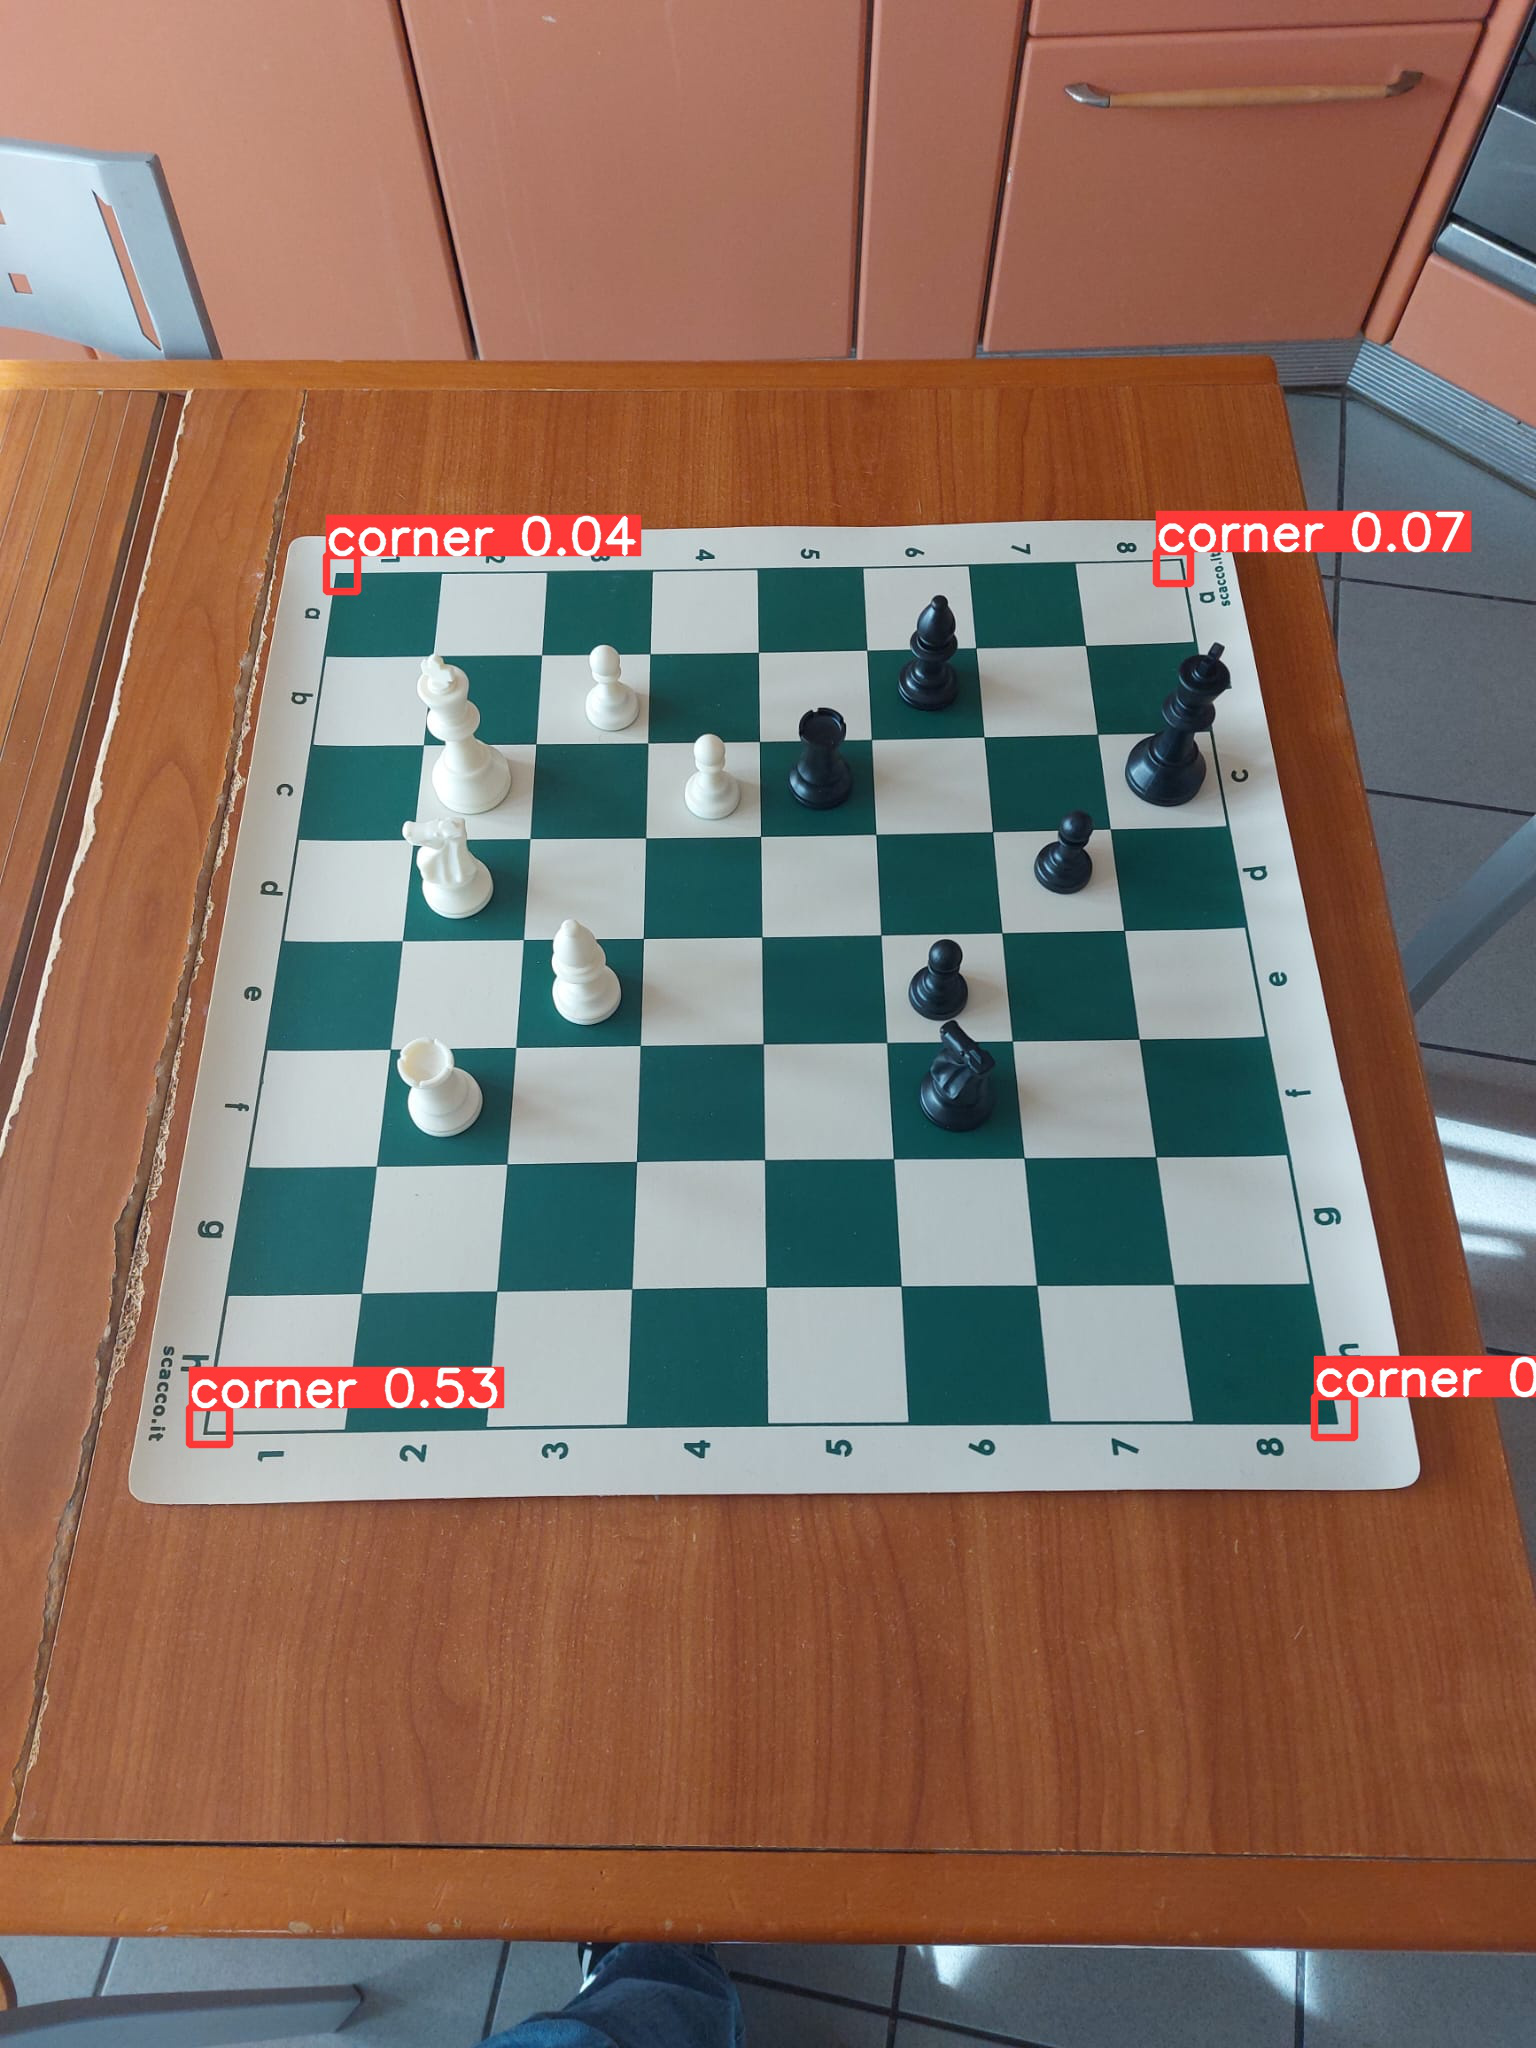

In [4]:
results = model_corner.predict("test_images\\test_images_real\IMG-20240208-WA0003.jpg", conf=0.001, iou=0.1, imgsz=640, max_det=4, save=True)
img = Image.open('runs\detect\predict5\IMG-20240208-WA0003.jpg')
display(img)


In [11]:
    boxes = results[0].boxes
    arr = boxes.xywh.numpy()
    points = arr[:,0:2]
    
    points

    def order_points(pts):
    
        # order a list of 4 coordinates:
        # 0: top-left,
        # 1: top-right
        # 2: bottom-right,
        # 3: bottom-left
    
        rect = np.zeros((4, 2), dtype = "float32")
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
    
        return rect
    
    corners = order_points(points)
    corners



array([[     341.82,      573.49],
       [     1173.9,      567.31],
       [     1334.4,      1416.9],
       [     209.22,        1426]], dtype=float32)

In [12]:
for corner in corners:
    plt.scatter(corner[0], corner[1])

img_show = plt.imshow(img)
img_show.show()

: 